In [1]:
import pandas as pd

# Step 1: Load dataset
df_sp = pd.read_csv("datasets/SanPedroSula_rooftop_solar_potential.csv")

# Basic structure check
print("Shape:", df_sp.shape)
print("\nColumns:\n", df_sp.columns.tolist())
print("\nPreview:")
print(df_sp.head())

Shape: (61932, 17)

Columns:
 ['OBJECTID', 'uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Estimated_Installation_Efficiency', 'Unit_installation_price', 'Date_added', 'aoi', 'roof_quality', 'Comment']

Preview:
   OBJECTID                                  uuid      City  Surface_area  \
0         1  76b12e06-ae05-4f38-a068-1df0d2b8f99a  Honduras     51.250000   
1         2  07c880be-7dea-40ba-8ba4-3718de7d6426  Honduras    189.039993   
2         3  a1427f04-5adc-4100-9d72-ea8a0fa1dc14  Honduras     32.490002   
3         4  324b6ea3-d344-4c09-a256-9b220c2bba12  Honduras     88.470001   
4         5  ea99f43a-c246-40e2-b9a7-c11574c0487d  Honduras     58.740002   

   Potential_installable_area  Peak_installable_capacity  \
0                   12.240000                   2.370000   
1                  117.099998  

In [2]:
# Step 2: Drop fully empty columns
df_sp = df_sp.drop(columns=['Unit_installation_price', 'Date_added', 'roof_quality', 'Comment'])

# Verify shape and columns
print("Shape after dropping:", df_sp.shape)
print("\nRemaining columns:\n", df_sp.columns.tolist())

Shape after dropping: (61932, 13)

Remaining columns:
 ['OBJECTID', 'uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Estimated_Installation_Efficiency', 'aoi']


In [3]:
# Step 3: Missing values and data types
print("Missing Values Summary:\n", df_sp.isna().sum())
print("\nData Types:\n", df_sp.dtypes)

Missing Values Summary:
 OBJECTID                                0
uuid                                    0
City                                    0
Surface_area                            0
Potential_installable_area              0
Peak_installable_capacity               0
Energy_potential_per_year               0
Assumed_building_type                   0
Estimated_tilt                          0
Estimated_building_height            3267
Estimated_capacity_factor             872
Estimated_Installation_Efficiency       0
aoi                                     0
dtype: int64

Data Types:
 OBJECTID                               int64
uuid                                  object
City                                  object
Surface_area                         float64
Potential_installable_area           float64
Peak_installable_capacity            float64
Energy_potential_per_year            float64
Assumed_building_type                 object
Estimated_tilt                       float

🧩 Step 3 Analysis – Missing Values & Data Types
✅ 1️⃣ Overall Data Health

Out of 61 932 rows, only two columns have missing values:

Estimated_building_height → 3 267 missing (≈ 5.3 %)

Estimated_capacity_factor → 872 missing (≈ 1.4 %)

All other columns are 100 % complete.

🧠 Interpretation:
That’s even cleaner than Tegucigalpa (which had ~9.8 % height missing).
These small gaps are totally acceptable — we can either keep them as NaN (most ML models can handle) or impute with mean/median later if needed.

✅ 2️⃣ Data Type Check
| Type      | Columns                                        | Meaning                                  |
| :-------- | :--------------------------------------------- | :--------------------------------------- |
| `int64`   | `OBJECTID`                                     | Identifier only — not used for analysis. |
| `object`  | `uuid`, `City`, `Assumed_building_type`, `aoi` | Categorical/text.                        |
| `float64` | All remaining numeric features                 | Perfect — ready for numeric operations.  |

Everything is typed correctly, no cleaning needed.

In [4]:
# Step 4: Descriptive statistics
numeric_cols = df_sp.select_dtypes(include=['float64', 'int64']).columns
stats = df_sp[numeric_cols].describe().T  # transpose for readability

print("Descriptive Statistics:\n")
print(stats)

Descriptive Statistics:

                                     count          mean           std  \
OBJECTID                           61932.0  30966.500000  17878.372773   
Surface_area                       61932.0    175.325595    363.206680   
Potential_installable_area         61932.0    103.185589    262.300502   
Peak_installable_capacity          61932.0     20.018111     50.890523   
Energy_potential_per_year          61932.0  28279.133064  74257.360028   
Estimated_tilt                     61932.0     14.941348      9.406329   
Estimated_building_height          58665.0      5.621908      3.157855   
Estimated_capacity_factor          61060.0   1406.598133     72.483071   
Estimated_Installation_Efficiency  61932.0    138.488904     35.970725   

                                      min           25%           50%  \
OBJECTID                             1.00  15483.750000  30966.500000   
Surface_area                         1.14     65.620003    113.639999   
Potential_insta

🧠 Interpretation

Distributions: Still right-skewed with large outliers → same treatment (log-scaled boxplots) will work.

Differences from Tegucigalpa:

San Pedro Sula has larger average roof area and energy potential.

Tilts are smaller → may indicate more flat commercial roofs.

Data quality slightly better (fewer missing).

Conclusion: Consistent pattern → same EDA pipeline can continue (missingness, outliers, zeros, correlations).

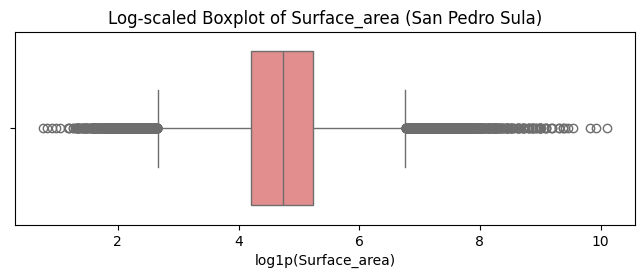

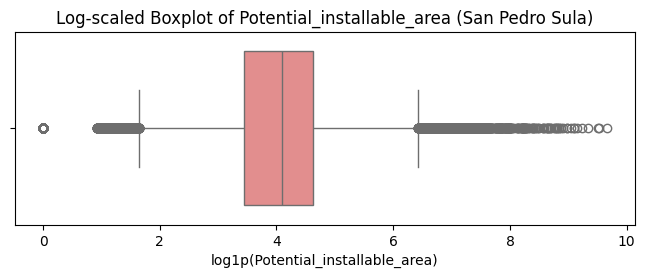

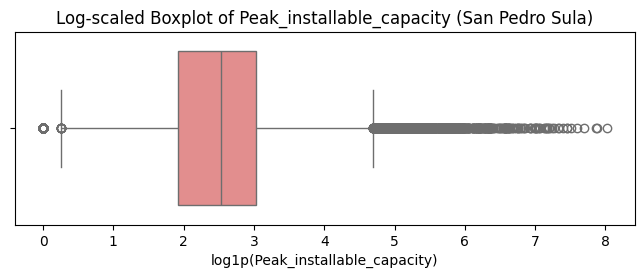

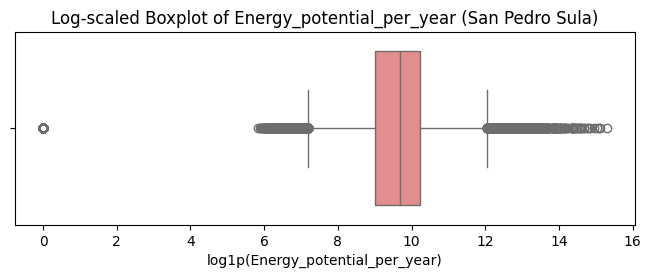

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 5: Log-scaled boxplots
cols_to_check = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year'
]

for col in cols_to_check:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(x=np.log1p(df_sp[col]), color='lightcoral')
    plt.title(f"Log-scaled Boxplot of {col} (San Pedro Sula)")
    plt.xlabel(f"log1p({col})")
    plt.show()

🧩 Step 5 Analysis – Log-Scaled Boxplots (San Pedro Sula)
| Variable                         | What you see                                                                     | Interpretation                                                                                                                                                        |
| :------------------------------- | :------------------------------------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Surface _area**                | Nice visible box, long tail of right-side dots.                                  | Typical roofs (middle 50 %) cluster tightly around 3 ≤ log(area) ≤ 5 → ≈ 20 – 150 m².  The dots beyond log ≈ 7 correspond to very large commercial roofs (> 1000 m²). |
| **Potential _installable _area** | Same pattern, almost identical range.                                            | Confirms that usable area scales almost linearly with total surface area.                                                                                             |
| **Peak _installable _capacity**  | Similar shape, fewer high-end dots.                                              | Most roofs produce up to ~20 kWp; a few extreme cases (> 1000 kWp) are industrial or public facilities.                                                               |
| **Energy _potential _per _year** | Still right-skewed even after log; box pushed left, long thin tail to the right. | Energy potential spans wide dynamic range—from small houses (< 5 MWh/yr) to very large systems (> 1000 MWh/yr).                                                       |

🧠 Interpretation

Overall shape is very similar to Tegucigalpa → consistent data generation process.

The number of extreme right-side points (outliers) seems slightly denser here → implies San Pedro Sula has proportionally more large commercial/industrial rooftops.

No weird spikes or secondary clusters → no data corruption, only genuine scale variation.

In [6]:
# Step 6: Quantify outliers beyond 99th percentile
outlier_summary_sp = {}

for col in ['Surface_area', 'Potential_installable_area',
            'Peak_installable_capacity', 'Energy_potential_per_year']:
    threshold = df_sp[col].quantile(0.99)
    n_outliers = (df_sp[col] > threshold).sum()
    outlier_summary_sp[col] = {
        '99th_percentile': threshold,
        'outlier_count': n_outliers,
        'outlier_percent': round(n_outliers / len(df_sp) * 100, 2)
    }

import pandas as pd
pd.DataFrame(outlier_summary_sp).T

,99th_percentile,outlier_count,outlier_percent
Surface_area,1177.345647,620.0,1.0
Potential_installable_area,821.206010,620.0,1.0
Peak_installable_capacity,159.259995,619.0,1.0
Energy_potential_per_year,227872.313750,620.0,1.0


🧩 Step 6 Analysis – Outlier Quantification (San Pedro Sula)
| Feature                        | 99th Percentile Cutoff | Outlier Count | % of Dataset | Interpretation                                                                               |
| :----------------------------- | ---------------------: | ------------: | -----------: | :------------------------------------------------------------------------------------------- |
| **Surface_area**               |               ~1177 m² |           620 |        1.0 % | Roofs larger than 1177 m² are among the biggest 1 % — likely industrial or public buildings. |
| **Potential_installable_area** |                ~821 m² |           620 |        1.0 % | Usable area threshold; same proportion — indicates consistent distribution.                  |
| **Peak_installable_capacity**  |               ~159 kWp |           619 |        1.0 % | Systems above 159 kWp are top 1 %; very large installations.                                 |
| **Energy_potential_per_year**  |      ~227,872 kWh/year |           620 |        1.0 % | Anything above 227 MWh/yr is in top 1 % — huge facilities.                                   |

🧠 Interpretation:

Both datasets have a similar tail size (1 %) but different scales — San Pedro Sula’s city fabric includes larger, high-capacity roofs.

That makes sense physically — San Pedro Sula is Honduras’s industrial capital, with more warehouses and factories.

In [7]:
# Step 6.2: Identify outlier building types
mask_outliers_sp = (
    (df_sp['Surface_area'] > df_sp['Surface_area'].quantile(0.99)) |
    (df_sp['Potential_installable_area'] > df_sp['Potential_installable_area'].quantile(0.99)) |
    (df_sp['Peak_installable_capacity'] > df_sp['Peak_installable_capacity'].quantile(0.99)) |
    (df_sp['Energy_potential_per_year'] > df_sp['Energy_potential_per_year'].quantile(0.99))
)

outlier_types_sp = df_sp.loc[mask_outliers_sp, 'Assumed_building_type'].value_counts()
normal_types_sp  = df_sp.loc[~mask_outliers_sp, 'Assumed_building_type'].value_counts()

print("Outlier Building Types:\n", outlier_types_sp)
print("\nNormal (non-outlier) Building Types:\n", normal_types_sp)

Outlier Building Types:
 Assumed_building_type
Commercial                   367
Industrial                    93
Schools                       81
Public health facilities      59
Single-family residential     45
Public                        31
Hotels                        10
Multi-family residential       3
Name: count, dtype: int64

Normal (non-outlier) Building Types:
 Assumed_building_type
Single-family residential    52462
Commercial                    5998
Public health facilities       880
Schools                        635
Public                         594
Industrial                     477
Hotels                         152
Multi-family residential        45
Name: count, dtype: int64


🧩 Step 6.2 Analysis – Outlier Building Type Breakdown (San Pedro Sula)
| Building Type                        | Outlier Count | Normal Count | Observation                                                                                                            |
| :----------------------------------- | ------------: | -----------: | :--------------------------------------------------------------------------------------------------------------------- |
| **Commercial**                       |           367 |        5 998 | Dominates outliers (≈ 60 % of them).  Confirms large commercial complexes / warehouses are driving the extreme values. |
| **Industrial**                       |            93 |          477 | Industrial share ↑ among outliers (~15 %) → consistent with San Pedro Sula’s industrial profile.                       |
| **Schools + Public health + Public** |     171 total |  2 109 total | Institutional buildings contribute many high-capacity roofs.                                                           |
| **Single-family residential**        |            45 |       52 462 | Only 0.08 % of residentials fall in top 1 % → large villas or mis-classified.                                          |
| **Hotels / Multi-family**            |         minor |        minor | Expected small representation.                                                                                         |

🧠 Interpretation

Outliers (≈ 620 rows = 1 %) are dominated by commercial and industrial roofs, not errors.

Single-family residential roofs form the bulk of the dataset (> 84 %), but they rarely reach outlier thresholds.

Hence, these extreme cases represent real high-capacity sites valuable for energy-potential aggregation, not anomalies.

In [8]:
# Step 7: Count zero values in main numeric columns
numeric_cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year'
]

for col in numeric_cols:
    zero_count = (df_sp[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df_sp)*100:.2f}%)")


Surface_area: 0 zeros (0.00%)
Potential_installable_area: 872 zeros (1.41%)
Peak_installable_capacity: 872 zeros (1.41%)
Energy_potential_per_year: 872 zeros (1.41%)


🧠 Interpretation

Zeros are physically meaningful: they represent real buildings that were excluded from solar installation feasibility.

The identical zero counts confirm these columns are linked (area → capacity → energy).

Compared to Tegucigalpa (2.34 % zeros), San Pedro Sula has fewer unusable rooftops — suggesting slightly better average suitability for solar panels.

In [9]:
# Step 8: Filter out zero-potential rows
df_sp_nozero = df_sp[
    (df_sp['Potential_installable_area'] > 0) &
    (df_sp['Peak_installable_capacity'] > 0) &
    (df_sp['Energy_potential_per_year'] > 0)
].copy()

print("Original dataset:", df_sp.shape)
print("Filtered (no-zero) dataset:", df_sp_nozero.shape)


Original dataset: (61932, 13)
Filtered (no-zero) dataset: (61060, 13)


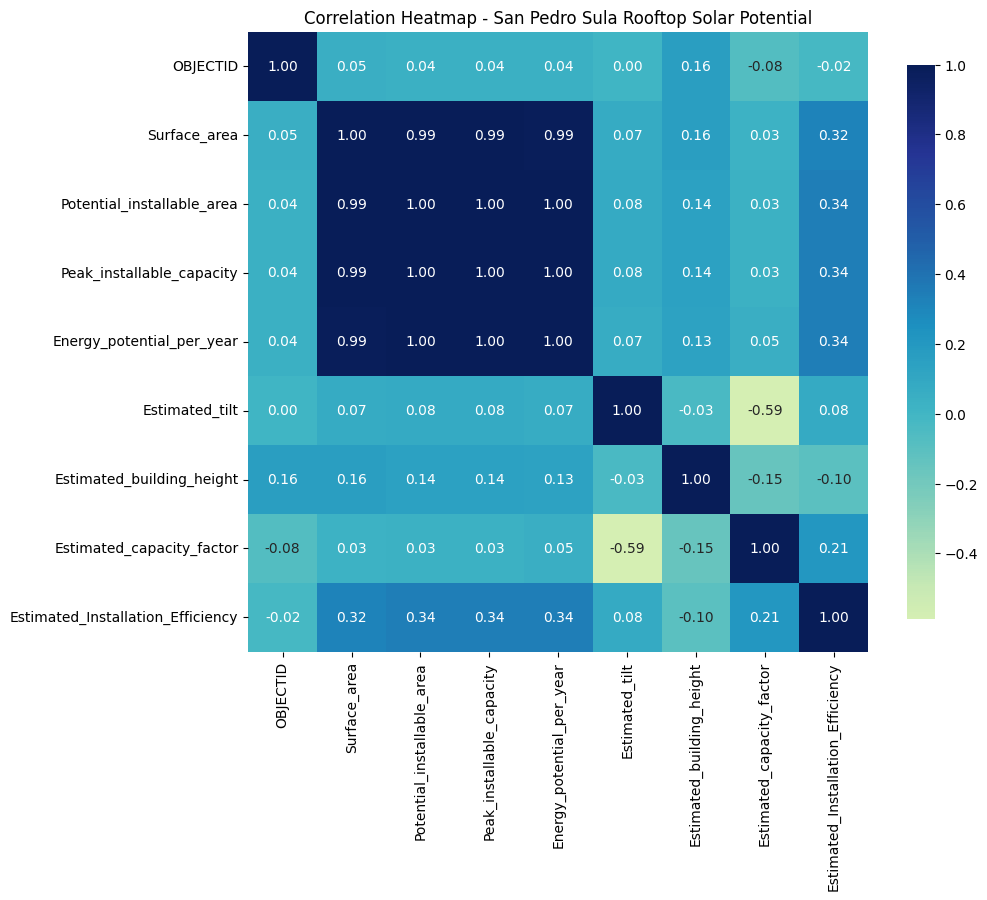

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 9: Correlation matrix
corr_sp = df_sp_nozero.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 9))
sns.heatmap(
    corr_sp,
    annot=True, fmt=".2f",
    cmap='YlGnBu', center=0,
    square=True, cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap - San Pedro Sula Rooftop Solar Potential", fontsize=12)
plt.show()